
# Clothing Classification

### Description

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 = T-shirt/top <br>
1 = Trouser <br>
2 = Pullover <br>
3 = Dress <br>
4 = Coat <br>
5 = Sandal <br>
6 = Shirt <br>
7 = Sneaker <br>
8 = Bag <br>
9 = Ankle boot <br>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

### Importing the dataset

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Let's create training and testing dataframes using CSV files

training_df = pd.read_csv('train_data.csv')
testing_df = pd.read_csv('test_data.csv')

### Visualizing the data

In [4]:
# Let's check first 5 rows of training dataframe

training_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Let's check last 5 rows of training dataframe

training_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Observations

1. There are 784 columns with various pixel values of different images
2. First column (i.e. label) is the column to be predicted. We will ignore the same initially.
3. There are 60000 observations in training dataset
4. All pixel values are between 0 to 255

In [6]:
# Let's check first 5 rows of testing dataframe

testing_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Let's check last 5 rows of testing dataframe

testing_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


### Observations

1. There are 784 columns with various pixel values of different images
2. There are 10000 observations in testing dataset
3. All pixel values are between 0 to 255

In [8]:
# Let's create numpy arrays for training and testing dataframes 
# using float values for further processing

trainData = np.array(training_df, dtype='float32')
testData = np.array(testing_df, dtype='float32')

In [9]:
# Let's check the training data and it's shape

print(trainData)
print('\n')
print(trainData.shape)

[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]


(60000, 785)


In [10]:
# Let's check the testing data

print(testData)
print('\n')
print(testData.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


(10000, 785)


3.0


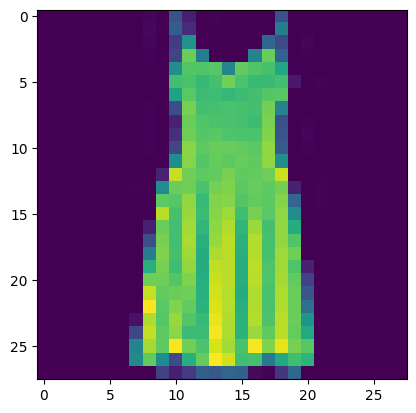

In [11]:
# Let's visualize an image randomly using any random number from training data

# Importing library random to get any random number

import random
i = random.randint(1, trainData.shape[0])

# Displaying a random image using pixel values(reshaped)

plt.imshow(trainData[i, 1:].reshape(28, 28))
print(trainData[i, 0])

# Let's check all class values with labels for reference

# 0 = T-shirt/top
# 1 = Trouser
# 2 = Pullover
# 3 = Dress
# 4 = Coat
# 5 = Sandal
# 6 = Shirt
# 7 = Sneaker
# 8 = Bag
# 9 = Ankle boot

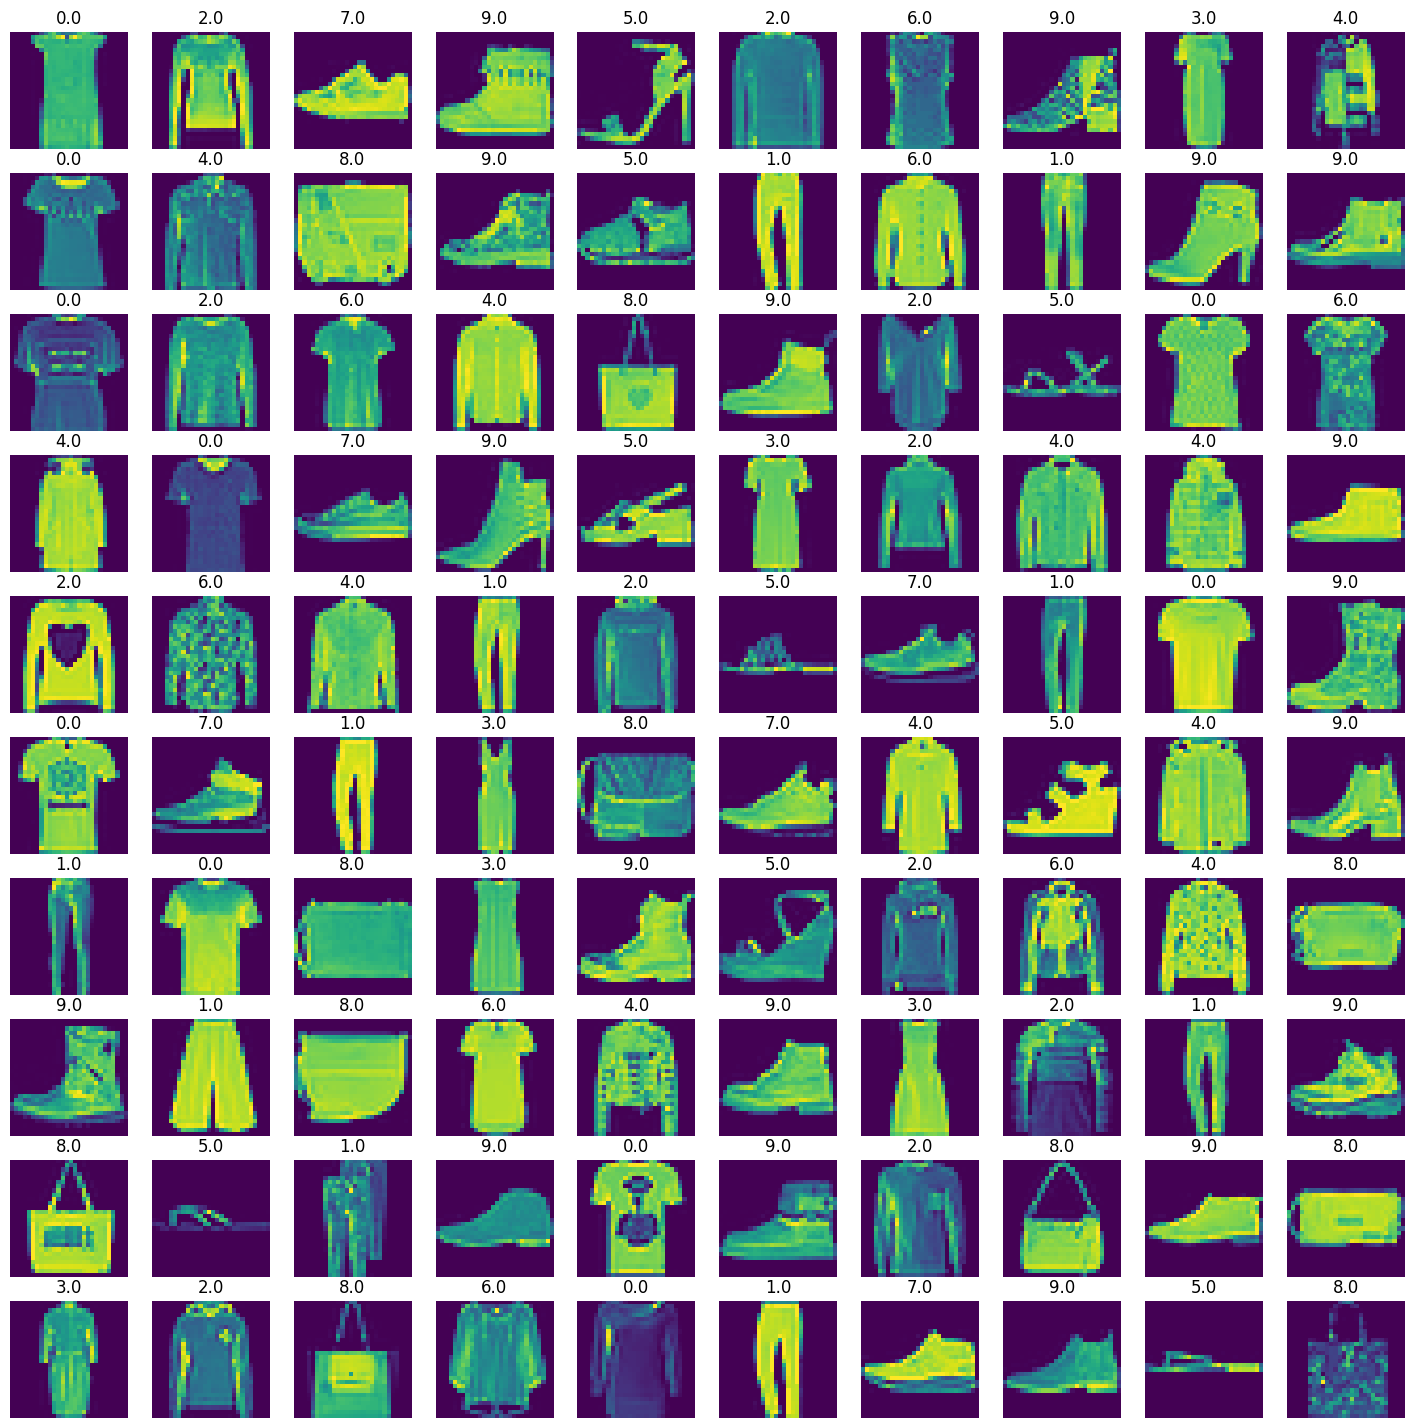

In [12]:
# Let's view multiple images in a grid format

Grid_W = 10 # Number of columns
Grid_H = 10 # Number of rows

# Let's create subplot to display multiple images

fig, axes = plt.subplots(nrows=Grid_H, ncols=Grid_W, figsize = (18,18))
axes = axes.ravel()

# Let's loop through the training dataset to display random 100 images

for i in np.arange(0, Grid_W*Grid_H):
    index = np.random.randint(0, len(trainData))
    axes[i].imshow(trainData[index, 1:].reshape(28, 28))
    axes[i].set_title(trainData[index, 0])
    axes[i].axis('off')   

### Splitting and reshaping the data

In [13]:
# Let's split the data into initial X_train and y_train data
# Normalizing each pixel value by dividing the same with 255
# i.e. Converting all pixel values between range 0 to 1

X_train_init = trainData[:, 1:] / 255 
y_train_init = trainData[:, 0]

# Let's do the same for test data

X_test = testData[:, 1:] / 255 
y_test = testData[:, 0]

In [14]:
# Let's split the training data further to create training and validation data

# Importing necessary library

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_init, y_train_init, 
                                                      test_size=0.2, random_state = 0)

In [15]:
X_train.shape

(48000, 784)

In [16]:
X_valid.shape

(12000, 784)

In [17]:
# Let's reshape the array similar to an image data e.g. (row, column, channel)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)

In [18]:
# Let's check the new shape of the training, testing and validation data

X_train.shape

(48000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_valid.shape

(12000, 28, 28, 1)

### Training a Neural Network Model

In [118]:
##########################################################
# Importing necessary libraries using keras to build a NN
##########################################################


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import tensorflow as tf

In [119]:
##########################
# design your first model
##########################



# Load test data
test_data = pd.read_csv('test_data.csv')
# Note: Similarly, train data needs to be loaded (assuming the file name as 'train_data.csv')
train_data = pd.read_csv('train_data.csv')  # Load train data


# Preprocess data
def preprocess_data(data):
    X = data.iloc[:, 1:].values / 255.0  # Normalize pixel values
    y = data.iloc[:, 0].values
    X = X.reshape(-1, 28, 28, 1)
    y = to_categorical(y)
    return X, y

X_train, y_train = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)




# Visualizations and reports
def plot_history(history, model_name):
    if not history.history:
        print(f"No history data to plot for {model_name}")
        return

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history.get('accuracy', []), label='accuracy')
    plt.plot(history.history.get('val_accuracy', []), label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history.get('loss', []), label='loss')
    plt.plot(history.history.get('val_loss', []), label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 1])
    plt.legend(loc='upper right')
    plt.title(f'{model_name} Loss')

    plt.show()


def plot_classification_report(model, X_test, y_test, model_name):
    print(f"{model_name} Classification Report:")
    y_pred = model.predict(X_test).argmax(axis=1)
    print(classification_report(y_test.argmax(axis=1), y_pred))

#################################
# Model 1: Design your first model
#################################
model1 = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [120]:
#############################
# compile your first model
############################


model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [121]:
###########################
# get summary of your model
###########################

print("Model 1 Summary:")
model1.summary()

Model 1 Summary:


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 422,026 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
#######################
# fit your first model
#######################


history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128)                     # epochs = 10 bood


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.6773 - loss: 0.8901 - val_accuracy: 0.8648 - val_loss: 0.3851
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.8679 - loss: 0.3621 - val_accuracy: 0.8827 - val_loss: 0.3255
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.8922 - loss: 0.3006 - val_accuracy: 0.8919 - val_loss: 0.2962
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.9048 - loss: 0.2567 - val_accuracy: 0.8861 - val_loss: 0.3098
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9171 - loss: 0.2243 - val_accuracy: 0.9115 - val_loss: 0.2471


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9096 - loss: 0.2379
Model 1 Test Accuracy: 0.9135000109672546


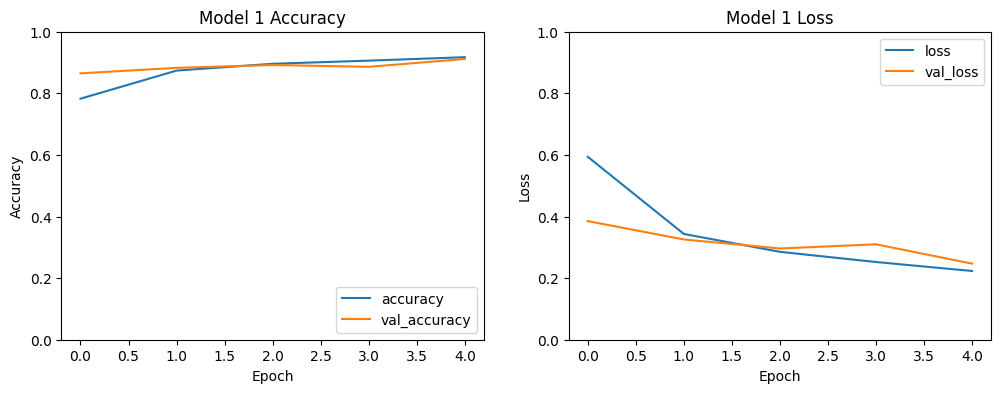

Model 1 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.98      0.99      0.98      1000
           2       0.90      0.83      0.86      1000
           3       0.90      0.93      0.92      1000
           4       0.80      0.93      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.82      0.68      0.74      1000
           7       0.96      0.95      0.95      1000
           8       0.99      0.98      0.99      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [123]:
###########################################################################################
# evaluate your first model and and plot your training curve and show classification report
###########################################################################################

test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
print(f"Model 1 Test Accuracy: {test_acc1}")

plot_history(history1, "Model 1")
plot_classification_report(model1, X_test, y_test, "Model 1")

In [124]:
##########################
# design your second model
##########################


model2 = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [125]:
#############################
# compile your second model
############################

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [126]:
###########################
# get summary of your model
###########################

print("Model 2 Summary:")
model2.summary()

Model 2 Summary:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 14, 14, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 7, 7, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 3, 3, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 1, 1, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 422,026 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
#######################
# fit your second model
#######################

history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128)                       # 10 bood


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.5758 - loss: 1.1123 - val_accuracy: 0.7763 - val_loss: 0.5986
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.7894 - loss: 0.5582 - val_accuracy: 0.8275 - val_loss: 0.4854
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.8327 - loss: 0.4500 - val_accuracy: 0.8469 - val_loss: 0.4219
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8539 - loss: 0.3983 - val_accuracy: 0.8452 - val_loss: 0.4032
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.8696 - loss: 0.3523 - val_accuracy: 0.8733 - val_loss: 0.3462


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8749 - loss: 0.3338
Model 2 Test Accuracy: 0.8783000111579895


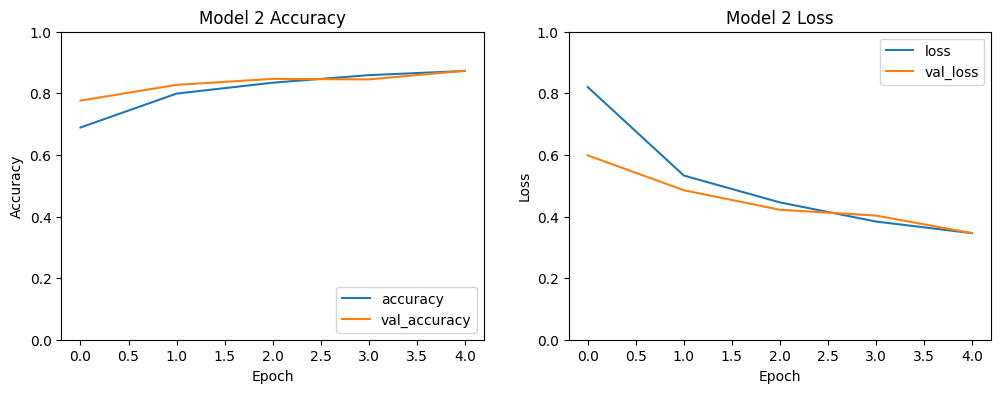

Model 2 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.74      0.87      0.80      1000
           3       0.94      0.85      0.89      1000
           4       0.78      0.85      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.76      0.57      0.65      1000
           7       0.94      0.93      0.93      1000
           8       0.94      0.99      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [128]:
###########################################################################################
# evaluate your second model and and plot your training curve and show classification report
###########################################################################################


test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
print(f"Model 2 Test Accuracy: {test_acc2}")

plot_history(history2, "Model 2")
plot_classification_report(model2, X_test, y_test, "Model 2")

In [129]:
##########################
# design your third model
##########################

best_model = model1 if test_acc1 > test_acc2 else model2

model3 = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)) if best_model == model1 else AveragePooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)) if best_model == model1 else AveragePooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)) if best_model == model1 else AveragePooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)) if best_model == model1 else AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [130]:
#############################
# compile your third model
############################

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [131]:
###########################
# get summary of your model
###########################

print("Model 3 Summary:")
model3.summary()

Model 3 Summary:


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 422,026 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
#######################
# fit your third model
#######################

history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128)                # 10 bood


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.6276 - loss: 0.9967 - val_accuracy: 0.8481 - val_loss: 0.4208
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.8468 - loss: 0.4195 - val_accuracy: 0.8838 - val_loss: 0.3197
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.8775 - loss: 0.3396 - val_accuracy: 0.8981 - val_loss: 0.2864
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.8931 - loss: 0.2996 - val_accuracy: 0.8973 - val_loss: 0.2767
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.8991 - loss: 0.2726 - val_accuracy: 0.9017 - val_loss: 0.2659


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8977 - loss: 0.2607
Model 3 Test Accuracy: 0.9021999835968018


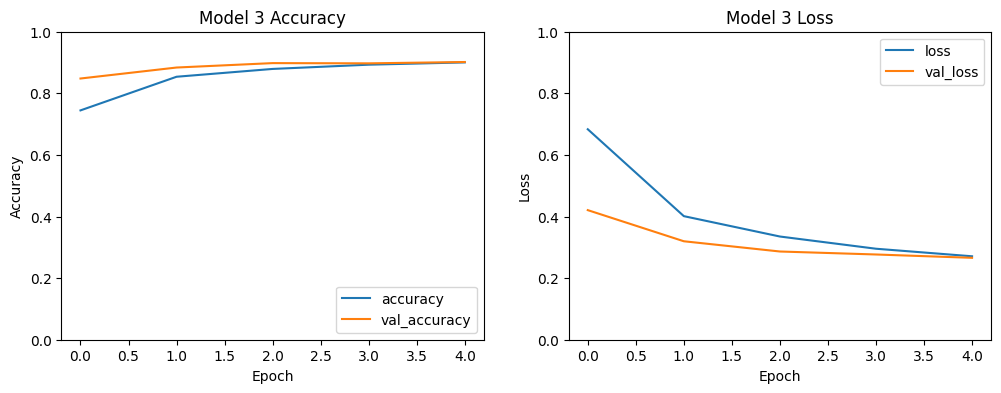

Model 3 Classification Report:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.79      0.85      1000
           3       0.94      0.87      0.91      1000
           4       0.83      0.88      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.66      0.83      0.74      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [134]:
###########################################################################################
# evaluate your third model and and plot your training curve and show classification report
###########################################################################################

test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
print(f"Model 3 Test Accuracy: {test_acc3}")

plot_history(history3, "Model 3")
plot_classification_report(model3, X_test, y_test, "Model 3")

In [143]:
from docx import Document

doc = Document()
doc.add_heading('پروژه سوم)کلاس بندی داده های تصویری', 0)

doc.add_heading('مقدمه:', level=1)
doc.add_paragraph("در این پروژه، هدف ما طراحی و پیاده‌سازی مدل‌های شبکه عصبی کانولوشنی (CNN) برای کلاس‌بندی تصاویر لباس‌ها است. دیتاست مورد استفاده شامل ۷۰۰۰۰ تصویر از لباس‌ها است که ۶۰۰۰۰ تصویر برای آموزش و اعتبارسنجی و ۱۰۰۰۰ تصویر برای تست جدا شده‌اند.")

doc.add_heading('چالش‌ها:', level=1)
doc.add_paragraph("1. فراخوانی کتابخانه‌های مورد نیاز.\n2. طراحی سه مدل کانولوشنی با ساختارهای مختلف.\n3. ارزیابی مدل‌ها و مقایسه آن‌ها بر اساس دقت.")

doc.add_heading('نتایج مدل‌ها و مقایسه آنها:', level=1)
doc.add_paragraph("نتایج نهایی دقت مدل‌ها به شرح زیر است:\n- Model 1 Test Accuracy: 0.9135\n- Model 2 Test Accuracy: 0.8783\n- Model 3 Test Accuracy: 0.9022\nبر اساس نتایج به دست آمده، مدل اول بهترین عملکرد را داشته است. مدل سوم با افزودن لایه Dropout کمی از دقت مدل اول کاسته است.")

doc.add_heading('Project 3: Image Data Classification', 0)

doc.add_heading('Introduction:', level=1)
doc.add_paragraph("In this project, our goal is to design and implement Convolutional Neural Network (CNN) models for classifying clothing images. The dataset used contains 70,000 images of clothing, with 60,000 images for training and validation, and 10,000 images for testing.")

doc.add_heading('Challenges:', level=1)
doc.add_paragraph("1. Importing necessary libraries.\n2. Designing three convolutional models with different structures.\n3. Evaluating the models and comparing them based on accuracy.")

doc.add_heading('Model Results and Comparison:', level=1)
doc.add_paragraph("The final test accuracy for the models are as follows:\n- Model 1 Test Accuracy: 0.9135\n- Model 2 Test Accuracy: 0.8783\n- Model 3 Test Accuracy: 0.9022\nBased on the results, the first model has the best performance. The third model, with the addition of the Dropout layer, has slightly reduced accuracy compared to the first model.")

doc.save('Clothing_Classification_Report.docx')
